# Linear Regression on Boston Housing Dataset

This project is one of my Machine Learning mini projects. For this project, we have a Boston housing dataset that contains  506 samples and 13 feature variables. The categories in the dataset, include:
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per ten thousand dollars
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in thousand dollars

The goal of this project is to create a Linear Regression model to predict the price of each houses based on the given features.

In [47]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Loading the Data
First, let's load the data from the scikit-learn library

In [8]:
boston_dataset = load_boston()
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

The Boston dataset contains:
- data: contains the information for various houses
- target: prices of the house
- feature_names: names of the features
- DESCR: describes the dataset

In [9]:
# Create a dataframe for the dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The target values MEDV is still missing from the data. So, we can add the 'MEDV' column to the dataframe.

In [10]:
# Add the 'MEDV'column to the dataframe
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Preprocessing the Data

In [11]:
# Checking for missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

As shown above, there are no missing values in this dataset.

## Exploratory Data Analysis (EDA)
Before we begin fitting a Linear Regression model on the data, let's try and eyeball it first. Here, we will make some visualizations to understand the relationship of the target variable with other features.

### Plotting the distribution of the target variable

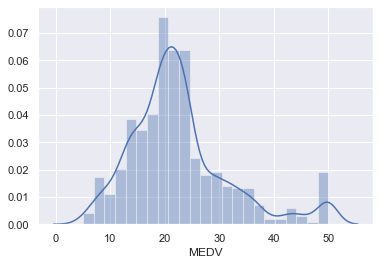

In [26]:
# Plot the distribution of MEDV
sns.distplot(boston['MEDV'])
plt.show()

From the plot, we can see that the values of MEDV are distributed normally with few outliers.

### Creating a correlation matrix
The correlation matrix is used to measure the linear relationships between the variables

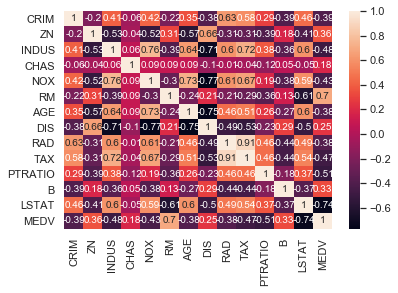

In [25]:
corr_matrix = boston.corr().round(2)  # Round to 2 decimal places
sns.heatmap(data=corr_matrix, annot=True)  # Set annot = True to print the values inside the squares
plt.show()

A quick look at the correlation matrix, we can observe that:
- RAD and TAX have a correlation of 0.91. This suggests that these feature pairs are strongly correlated to each other. Considering multicollinearity, we should not select these features to train our model.
- RM has a strong positive correlation with MEDV having a correlation coefficient of 0.7. On the other hand, LSTAT has a high negative correlation with MEDV having a correlation coefficient of -0.74. Since these features have a high correlation with our target variable MEDV, we will use RM and LSTAT as our features.

## Building the Model
Finally, we can build our Linear Regression model from the data.

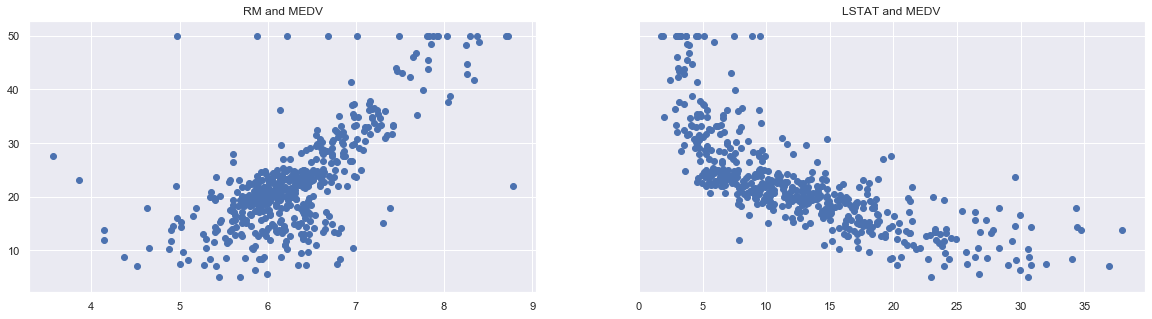

In [36]:
# Declaring the features and the label
features = boston[['RM', 'LSTAT']]
label = boston['MEDV']

# Create scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,5))  # Share 'MEDV' as the y-axis
ax1.scatter(features['RM'], label)
ax1.set_title('RM and MEDV')
ax2.scatter(features['LSTAT'], label)
ax2.set_title('LSTAT and MEDV')
plt.show()

From the scatter plots above, we can make some observations:
- The MEDV increase as the value of RM increases linearly. However, there are a few outliers in the data.
- The MEDV tend to decrease with an increase in LSTAT although it doesn’t exactly follow a linear line.

In [48]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets with a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)

In [49]:
from sklearn.linear_model import LinearRegression

# Build and fit the model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make the predictions
pred = reg.predict(X_test)

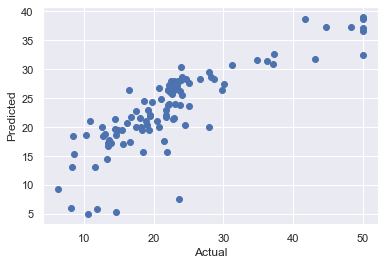

In [53]:
# Create a scatter plot between the actual and predicted values
plt.scatter(y_test, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

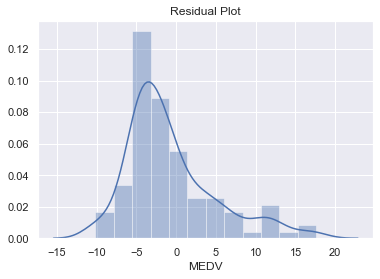

In [54]:
# Create a residual plot
sns.distplot(y_test - pred)
plt.title('Residual Plot')
plt.show()

## Evaluating the Model

In [58]:
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 4.505211813354638
MSE: 32.08375607139391
RMSE: 5.6642524724268695


## Summarizing and Interpreting the Results

In [60]:
# Create a regression summary
reg_summary = pd.DataFrame(features.columns.values, columns=['Features'])
reg_summary['Coefficients'] = reg.coef_
reg_summary

,Features,Coefficients
0,RM,4.538969
1,LSTAT,-0.659308


Let's try to interpret some of the coefficients for the features. Assuming all other features stay fixed:
- A 1 unit increase in the RM leads to an approximate 4.538969 unit increase in the MEDV.
- A 1 unit increase in the LSTAT leads to an approximate 0.659308 unit decrease in the MEDV.

Therefore, based on our findings, we can conclude that RM (the average number of rooms per dwelling) is a strong determining factor of a house's price.